### Importing the data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics 

from random import randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
from tsfresh import select_features
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features

In [4]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Loading the Datasets

In [6]:
Xextract = pd.read_csv('X_extractedfull.csv')

In [12]:
Xextract = Xextract.drop(['Unnamed: 0'], axis = 1)

In [13]:
Xextract.head()

,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__minimum,value__sum_values.1,...,value__minimum.15,value__sum_values.16,value__median.16,value__mean.16,value__length.16,value__standard_deviation.16,value__variance.16,value__root_mean_square.16,value__maximum.16,value__minimum.16
0,964040.95,156.25,160.673492,6000.0,13.938147,194.271939,161.276914,191.51,145.83,656801.481,...,30.363,34.617,0.5770,0.576950,60.0,0.026852,0.000721,0.577575,0.624,0.532
1,963619.92,156.06,160.603320,6000.0,14.117791,199.312019,161.222636,191.47,145.73,656129.342,...,33.648,33.951,0.5595,0.565850,60.0,0.027013,0.000730,0.566494,0.626,0.524
2,962086.32,155.72,160.347720,6000.0,14.191436,201.396849,160.974495,191.41,145.37,654953.068,...,35.098,34.592,0.5620,0.576533,60.0,0.036422,0.001327,0.577683,0.662,0.529
3,961128.53,155.56,160.188088,6000.0,14.226617,202.396639,160.818594,191.34,145.14,654388.843,...,36.105,34.156,0.5550,0.569267,60.0,0.033184,0.001101,0.570233,0.645,0.527
4,960002.83,155.34,160.000472,6000.0,14.275244,203.782600,160.636028,191.41,144.95,653588.606,...,36.992,34.642,0.5760,0.577367,60.0,0.033203,0.001102,0.578321,0.660,0.524


### Train -Test split

In [14]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [15]:
profile_hydraulic = profile['Hydraulic Accumulator']

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(Xextract, profile_hydraulic, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_hydraulic)

In [18]:
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())

90     566
130    419
115    279
100    279
Name: Hydraulic Accumulator, dtype: int64
90     242
130    180
115    120
100    120
Name: Hydraulic Accumulator, dtype: int64


In [19]:

## SMOTE method is used to balance data
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_sample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns=X_train.columns)

y_train_smt = pd.DataFrame(y_train)

In [20]:
y_train_smt['Hydraulic Accumulator'].value_counts()

115    566
130    566
100    566
90     566
Name: Hydraulic Accumulator, dtype: int64

### Standardisation

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [24]:
X_train_scaled.columns = Xextract.columns 
X_test_scaled.columns = Xextract.columns 

In [25]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV

from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### SVM for Cooler condition classification

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [28]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_scaled, y_train)
svm_predictions = svm_model_linear.predict(X_test_scaled)

In [29]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[240,   1,   1,   0],
       [  1, 114,   5,   0],
       [  0,   1, 114,   5],
       [  0,   0,  12, 168]], dtype=int64)

In [30]:
def cmatrix(model):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, X_test_scaled,y_test,ax = ax,
                                        display_labels = ['Close to Total failure','Severely reduced pressure','Slightly reduced pressure','Optimum pressure'])
    return disp.confusion_matrix
    

array([[240,   1,   1,   0],
       [  1, 114,   5,   0],
       [  0,   1, 114,   5],
       [  0,   0,  12, 168]], dtype=int64)

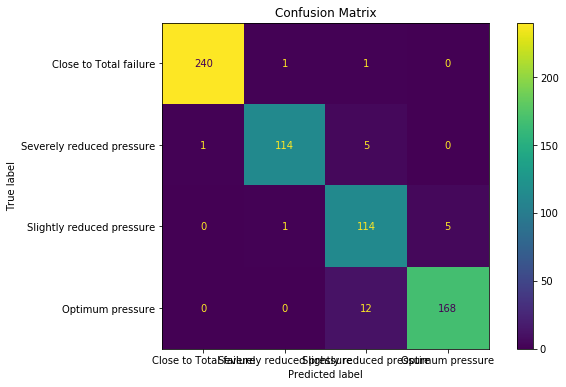

In [31]:
cmatrix(svm_model_linear)

In [32]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_scaled)))

              precision    recall  f1-score   support

          90       1.00      0.99      0.99       242
         100       0.98      0.95      0.97       120
         115       0.86      0.95      0.90       120
         130       0.97      0.93      0.95       180

    accuracy                           0.96       662
   macro avg       0.95      0.96      0.95       662
weighted avg       0.96      0.96      0.96       662



In [33]:
y_score_svm = svm_model_linear.fit(X_train_scaled, y_train).decision_function(X_test)
y_score_svm

array([[-0.33333332,  1.33333327,  2.3333333 ,  3.3333333 ],
       [-0.33333332,  1.33333327,  2.3333333 ,  3.3333333 ],
       [-0.33333332,  1.33333327,  2.3333333 ,  3.3333333 ],
       ...,
       [-0.33333332,  1.33333327,  2.3333333 ,  3.3333333 ],
       [-0.33333332,  1.33333327,  2.3333333 ,  3.3333333 ],
       [-0.33333332,  1.33333327,  2.3333333 ,  3.3333333 ]])

In [34]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(y_score, X_test, y_test, n_classes= 4, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

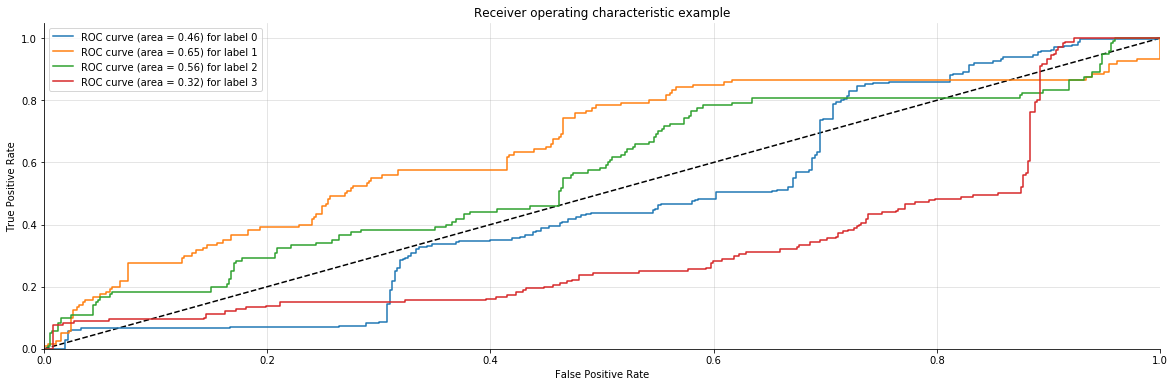

In [35]:
plot_multiclass_roc(y_score_svm,X_test_scaled, y_test, 4)

### Building an RF classifier for Cooler 

In [36]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

array([[236,   5,   1,   0],
       [  2, 117,   1,   0],
       [  1,   2, 116,   1],
       [  0,   0,   1, 179]], dtype=int64)

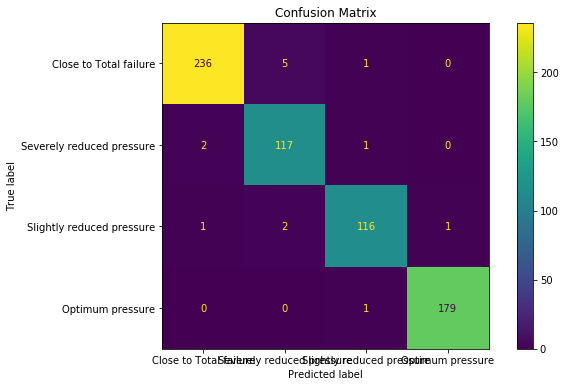

In [37]:
cmatrix(classifier_rf)

In [38]:
y_score_rf = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf

array([[0. , 1. , 0. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0.3, 0.5, 0.2, 0. ],
       ...,
       [0. , 0. , 0. , 1. ],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.9]])

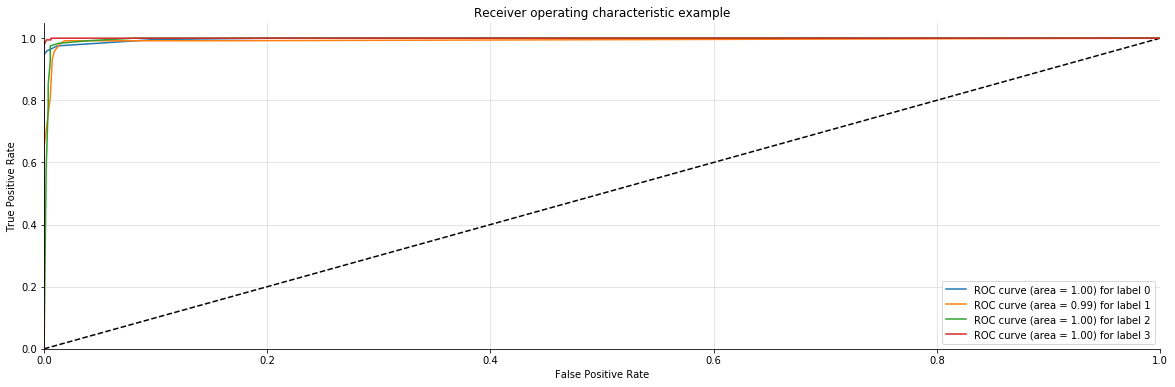

In [39]:
plot_multiclass_roc(y_score_rf, X_test_scaled, y_test, n_classes=4, figsize=(20, 6))

In [40]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

          90       0.99      0.98      0.98       242
         100       0.94      0.97      0.96       120
         115       0.97      0.97      0.97       120
         130       0.99      0.99      0.99       180

    accuracy                           0.98       662
   macro avg       0.98      0.98      0.98       662
weighted avg       0.98      0.98      0.98       662



### kNN for cooler failure classification

In [41]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_scaled, y_train)


array([[199,  38,   5,   0],
       [  3,  94,  23,   0],
       [  1,  15,  98,   6],
       [  0,   3,  11, 166]], dtype=int64)

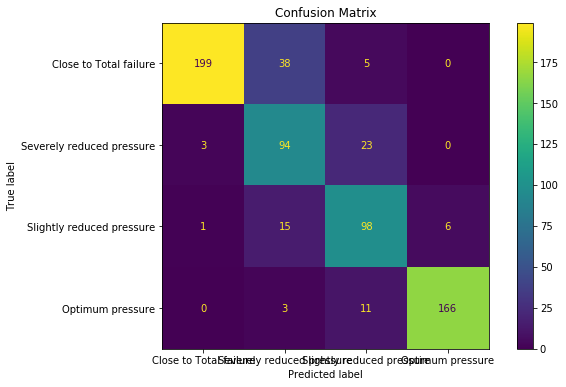

In [42]:
cmatrix(knn)

In [43]:
y_score_knn = knn.fit(X_train_scaled, y_train).predict_proba(X_test)
y_score_knn

array([[0.28571429, 0.14285714, 0.57142857, 0.        ],
       [0.28571429, 0.14285714, 0.57142857, 0.        ],
       [0.28571429, 0.14285714, 0.57142857, 0.        ],
       ...,
       [0.28571429, 0.14285714, 0.57142857, 0.        ],
       [0.28571429, 0.14285714, 0.57142857, 0.        ],
       [0.28571429, 0.14285714, 0.57142857, 0.        ]])

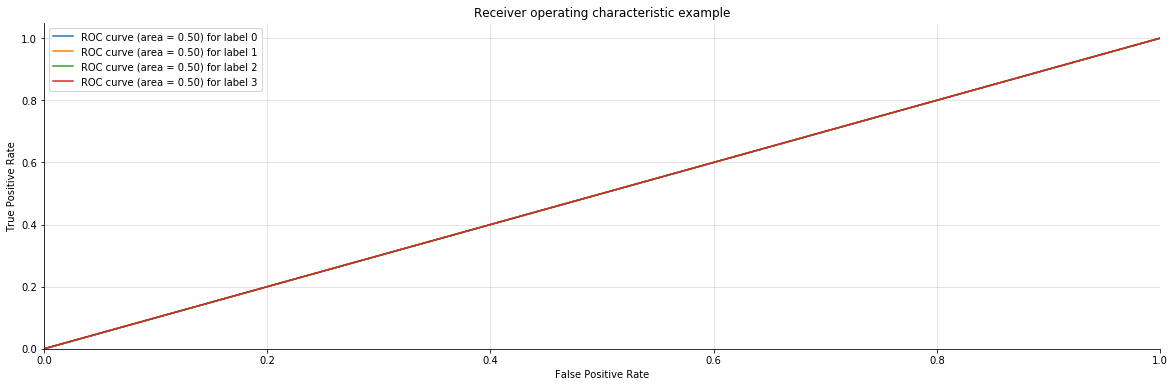

In [44]:
plot_multiclass_roc(y_score_knn, X_test_scaled, y_test, n_classes=4, figsize=(20, 6))

In [45]:
print(metrics.classification_report(y_test, knn.predict(X_test_scaled)))

              precision    recall  f1-score   support

          90       0.98      0.82      0.89       242
         100       0.63      0.78      0.70       120
         115       0.72      0.82      0.76       120
         130       0.97      0.92      0.94       180

    accuracy                           0.84       662
   macro avg       0.82      0.84      0.82       662
weighted avg       0.86      0.84      0.85       662



### Performance in Noise

In [46]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)

X_testnoise = X_test_scaled + noise

              precision    recall  f1-score   support

          90       0.61      0.62      0.61       242
         100       0.54      0.31      0.39       120
         115       0.45      0.39      0.42       120
         130       0.55      0.74      0.63       180

    accuracy                           0.55       662
   macro avg       0.54      0.51      0.51       662
weighted avg       0.55      0.55      0.54       662



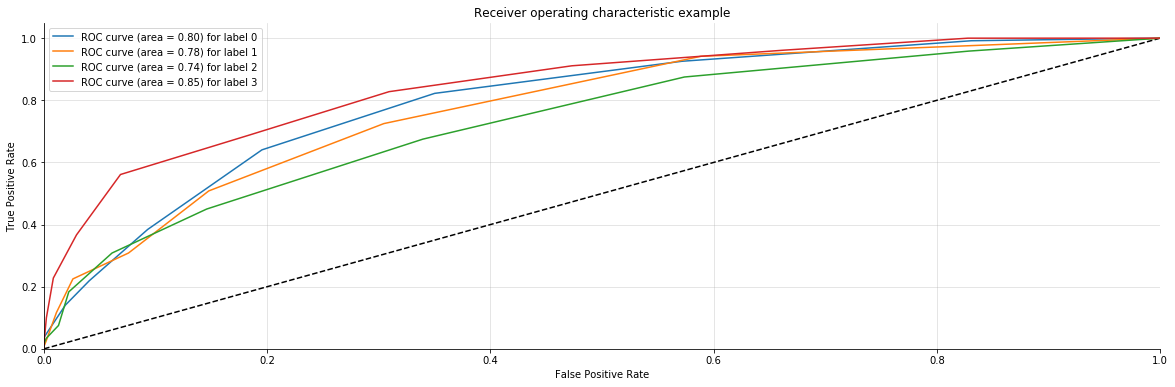

In [47]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_testnoise)))

y_score_rf_hypernoise = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_testnoise)
y_score_rf_hypernoise

plot_multiclass_roc(y_score_rf_hypernoise, X_testnoise, y_test, n_classes=4, figsize=(20, 6))

              precision    recall  f1-score   support

          90       0.96      0.80      0.87       242
         100       0.57      0.75      0.65       120
         115       0.68      0.76      0.72       120
         130       0.95      0.90      0.92       180

    accuracy                           0.81       662
   macro avg       0.79      0.80      0.79       662
weighted avg       0.84      0.81      0.82       662



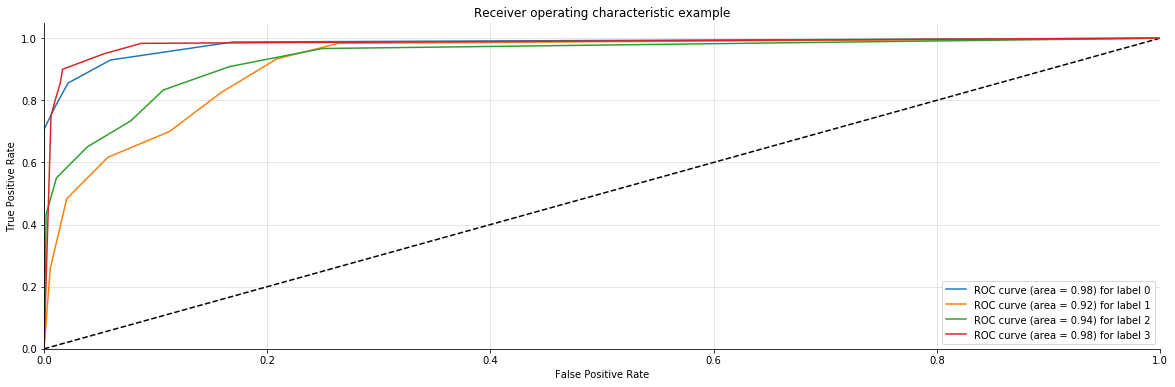

In [48]:
print(metrics.classification_report(y_test, knn.predict(X_testnoise)))

y_score_knnnoise = knn.fit(X_train_scaled, y_train).predict_proba(X_testnoise)
y_score_knnnoise

plot_multiclass_roc(y_score_knnnoise, X_testnoise, y_test, n_classes=4, figsize=(20, 6))

              precision    recall  f1-score   support

          90       0.82      0.77      0.80       242
         100       0.52      0.57      0.54       120
         115       0.46      0.49      0.47       120
         130       0.71      0.68      0.70       180

    accuracy                           0.66       662
   macro avg       0.63      0.63      0.63       662
weighted avg       0.67      0.66      0.66       662



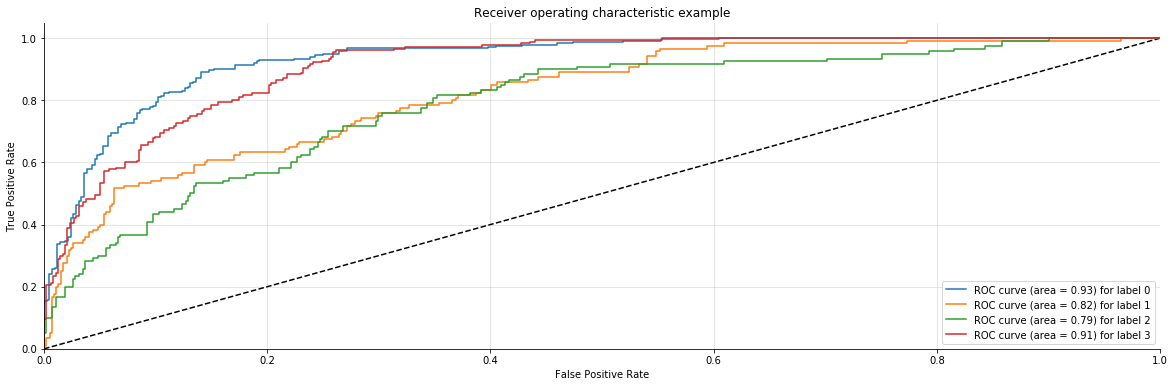

In [49]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_testnoise)))

y_score_svmnoise = svm_model_linear.fit(X_train_scaled, y_train).decision_function(X_testnoise)
y_score_svmnoise

plot_multiclass_roc(y_score_svmnoise, X_testnoise, y_test, n_classes=4, figsize=(20, 6))

### Building a Gradient boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# First we construct our gradient boosting model, 
# We specify 500 trees to start, each with a maximum 
# depth of three. We also specify the random_state 
# hyperparameter to ensure reproduceability.
gbtc = GradientBoostingClassifier(n_estimators=100, random_state= 42)

In [ ]:
parameters = {'max_depth':np.arange( 2,6,1 ).tolist()}

In [ ]:
clf_gbtc = GridSearchCV(gbtc, parameters,cv=6, n_jobs= -1, iid = True,  refit= True,pre_dispatch= '2*n_jobs')

In [ ]:
clf_gbtc.fit(X_train_scaled, y_train)

In [ ]:
cmatrix(clf_gbtc)

In [ ]:
y_score_gbtc = clf_gbtc.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_gbtc

In [ ]:
plot_multiclass_roc(y_score_gbtc, X_test_scaled, y_test, n_classes=3, figsize=(20, 6))

In [ ]:
import xgboost as xgb

In [ ]:
seed= 24
xgb1 = xgb.sklearn.XGBClassifier(learning_rate =0.1,n_estimators=100,max_depth=5,min_child_weight=11,
             gamma=0.1,subsample=0.8,colsample_bytree=0.7,objective='multi:softprob',n_jobs=-1,scale_pos_weight=1,
             seed=seed)
    
xgb1.fit(X_train, y_train)
    
y_pred= xgb1.predict(X_test)
    
    #confusion matrix and classification report
    
cm = confusion_matrix(y_test, y_pred)
    
print(classification_report(y_test, y_pred))